In [36]:
import pandas as pd
import re
from scipy import stats
import matplotlib.pyplot as plt
dog_data = pd.read_csv("dog_rates_tweets.csv", parse_dates=['created_at'])
#print(dog_data.head())

input_pattern = re.compile(r'\d+\/10')

def filterText(input_string):
    text_pattern = re.compile(r'\d+\/10')
    match = text_pattern.search(input_string)
    if match:
        return match.group()
    else:
        return None

dog_data['data'] = dog_data['text'].apply(filterText)


#Remove outliers - anything larger than 25/10
def validateRating(input_data):
    if input_data == None:
        return None
    data_pattern = re.compile(r'([0-2]{1,}[0-5]?|[0-9]?)\/10')
    match = data_pattern.search(input_data)
    if match:
        return float(match.group(1))
    else:
        return None

dog_data['rating'] = dog_data['data'].apply(validateRating)
data = dog_data[dog_data['rating']>=0]

def to_timestamp(dtObj):
    return dtObj.timestamp()

data['timestamp'] = data['created_at'].apply(to_timestamp)
print(data.head())

                    id          created_at  \
2   994363623421153280 2018-05-09 23:48:56   
7   993889039714578432 2018-05-08 16:23:07   
8   993629544463642624 2018-05-07 23:11:58   
24  992198572664860672 2018-05-04 00:25:48   
30  991744041351090177 2018-05-02 18:19:39   

                                                 text   data  rating  \
2   b'This is Louie. He has misplaced his Cheerio....  14/10    14.0   
7   b'This is Manny. He hasn\xe2\x80\x99t seen you...  13/10    13.0   
8   b'This is Libby. She leap. 14/10\n(IG: libbyth...  14/10    14.0   
24  b'This is Rosie. She thought Coachella was thi...  13/10    13.0   
30  b'This is Riley. He\xe2\x80\x99ll be your chau...  13/10    13.0   

       timestamp  
2   1.525910e+09  
7   1.525797e+09  
8   1.525735e+09  
24  1.525394e+09  
30  1.525285e+09  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
data

,id,created_at,text,data,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,b'This is Louie. He has misplaced his Cheerio....,14/10,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,b'This is Manny. He hasn\xe2\x80\x99t seen you...,13/10,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,b'This is Libby. She leap. 14/10\n(IG: libbyth...,14/10,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,b'This is Rosie. She thought Coachella was thi...,13/10,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,b'This is Riley. He\xe2\x80\x99ll be your chau...,13/10,13.0,1.525285e+09
35,991399795892916224,2018-05-01 19:31:45,b'This is B-Mo. He has a heart on his butt and...,13/10,13.0,1.525203e+09
41,990987750601093120,2018-04-30 16:14:26,b'Say hello to Meatball. I\xe2\x80\x99m told h...,13/10,13.0,1.525105e+09
50,989657223084244992,2018-04-27 00:07:23,b'This is Oakley. He picked you some flowers. ...,14/10,14.0,1.524788e+09
55,989300750152069120,2018-04-26 00:30:53,b'Meet Max. She pouts until someone holds her....,12/10,12.0,1.524703e+09
59,989176681243070464,2018-04-25 16:17:53,b'This is Trout. He lives a life of luxury. Pr...,13/10,13.0,1.524673e+09


In [42]:
fit = scipy.stats.linregress(data['timestamp'], data['rating'])


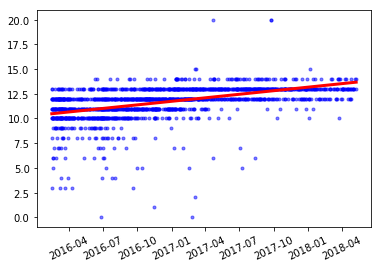

In [44]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()